# Machine Learning II

Despúes de conocer como funciona una nuerona artifical, tambien conocida como unidad central de procesamiento, en este notebook estudiaremos las redes neuronales, multilayer perceptron (MLP), que son la conexion de varios neurones artificiales a lo largo diferentes capas, entre mas capas de neurones interconectadas tenga una red mas posibilidades de aprendizaje de caracteristicas mas complejas tendra. La siguiente figura muestra una red MLP de 4 capas, una de entrada dos ocultas y una de salida.


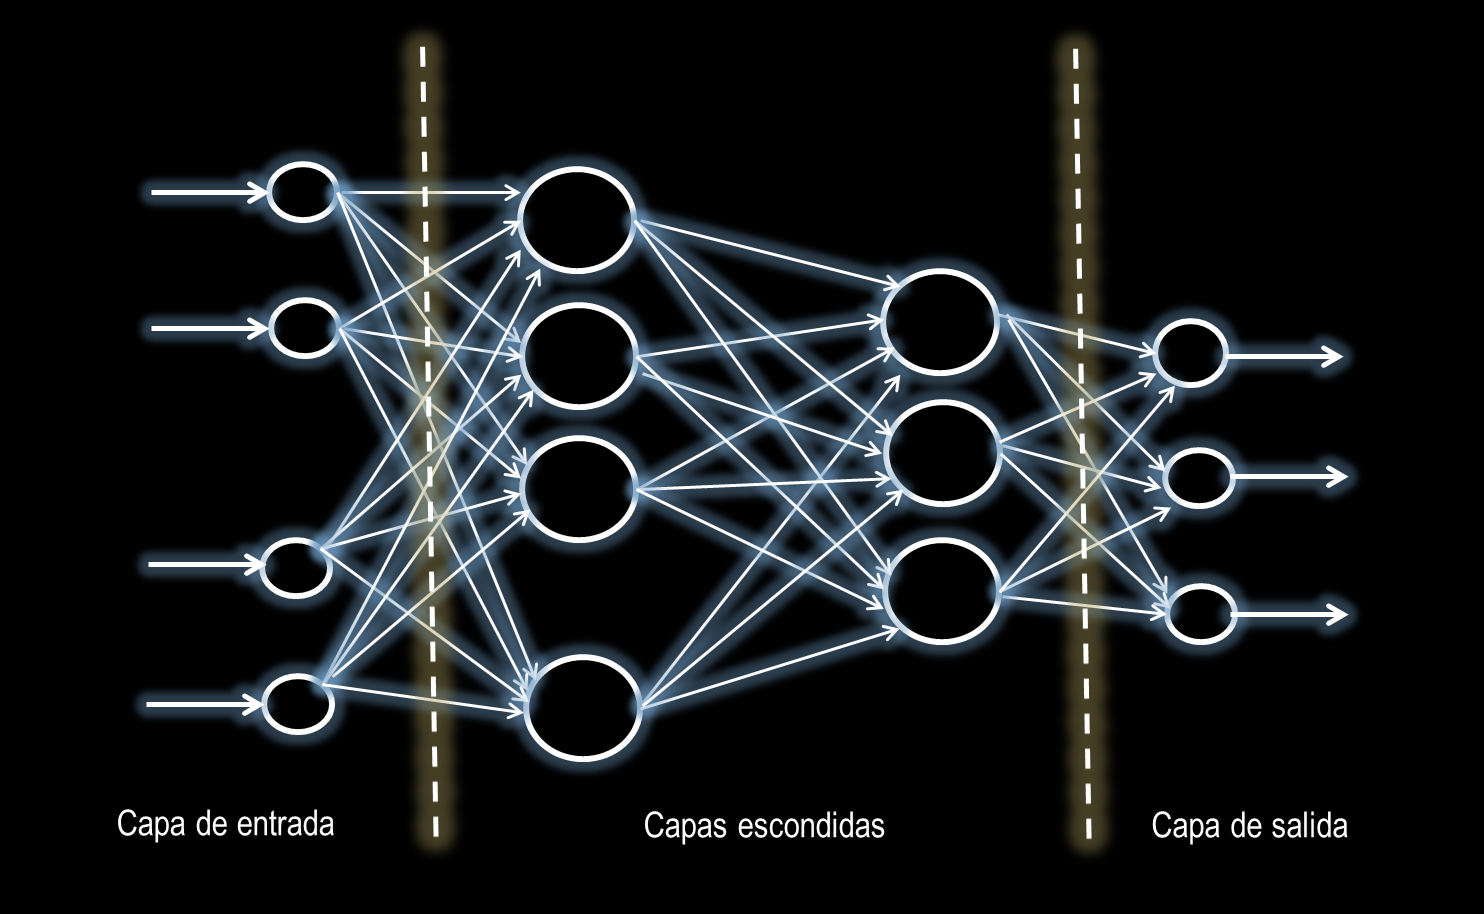

In [1]:
from IPython.display import Image
Image('MLP.PNG', width=900)

Todo el proceso de aprendizaje ocurre en las capas de neuronas. La primera capa de entrada o también llamada de distribución es solo un nombre figurativo ya que en realidad no posee ningún tipo de neurona, conteniendo apenas un numero de nodos igual al número de señales de entrada de la red, su única función es representar la distribución de los datos de entrada para cada neurona de la capa siguiente.

A continuación le siguen las capas escondidas que pueden estar representadas por una, muchas o inclusive ninguna capa de neuronas, la función principal de estas neuronas es capacitar a la red para extraer características, además de conseguir representar problemas que no sean linealmente separables como los presentados en el notebook anterior.

Finalmente contamos con una capa de salida, que contiene necesariamente un numero de neuronas igual al número de señales de la red. Ajustando los valores de los pesos sinápticos, la red puede representar o "memorizar" las relaciones entre los datos de entrada y los datos de salida, asumiendo así una característica de memoria asociativa. Es así que todo el proceso de aprendizaje ocurre en las capas ocultas o escondidas.

El proceso de aprendizaje de una red neuronal puede ser de dos formas:
* Aprendizaje supe visionado: el cual requiere de un conjunto de datos previamente etiquetados para llegar a una respuesta adecuada, así el algoritmo extraerá una representación del conocimiento a partir de estos ejemplos. Esto es guiar paso a paso a la red para que aprenda lo que se requiere
* Aprendizaje no sueprvisionado: en este tipo de aprendizaje no se cuenta con datos etiquetados todos se hace por medio de agrupación de patrones para encontrar los que mas se relacionen entre si y conseguir llegar al objetivo.

En este notebook nos centraremos en la implementación de una red neuronal MLP con aprendizaje supervisionado.






#Multilayer perceptron para clacificación de dígitos.

En este ejemplo vamos a utilizar el conjunto de datos MNIST que es un banco de datos de dígitos numéricos escritos a mano, este dataset consta de 60 mil imágenes de entrenamiento y 10 mil imágenes de prueba, para facilitar la etapa de entrenamiento se trabajara con una version reducidad del dataset de 42 mil imagenes en totoal, de las cuales 33600 serán usadas para entrenamiento y el resto para teste. Para conocer un poco más sobre este banco de datos diríjase a la página oficial  [MNIST](http://yann.lecun.com/exdb/mnist/) 

El objetivo de este ejemplo es hacer una predicción dado un conjunto de datos, en nuestro caso será pasar a la capa de entrada un conjunto de pixeles que representan los números del 0 al 9 y clasificaremos la salida o el digito que corresponda a esos datos de entrada.




In [2]:
#importamos las librerias necesarias para trabajar en este ejemplo
import numpy as np
import pandas as pd
from  sklearn.preprocessing import StandardScaler

In [3]:
#marcamos una semilla para reproducir siempre los mismos resultados
np.random.seed(1337)

In [5]:
#leemos el dataset
df = pd.read_csv("https://raw.githubusercontent.com/hdspgroup/hdspgroup.github.io/master/data/mnist.csv")

In [6]:
# la siguiente es una tabla que contiene el dataset donde cada fila representa una imágen con un determinado número como se puede observar
#la primera columna son las etiquetas, o sea el número correspondiente a esa determinada imágen
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#separamos las imagenes de entrenamiento
df_train = df.iloc[:33600,:]

#separamos la columna que contiene las etiquetas y normalizamos el resto de columnas para que queden entre 0 y 1
X_train = df_train.iloc[:,1:].values /255.
y_train = df_train['label'].values
#La siguiente linea es usada para facilitar el proceso de aprendizaje es crear variables dummies donde cada fila representa el número de la imágen en cuestion
y_train_onehot = pd.get_dummies(df_train['label']).values

In [11]:
#preparamos los atos para teste
df_test = df.iloc[33600:,:]
X_test = df_test.iloc[:,1:].values / 255.
y_test = df_test['label'].values

y_test_onehot = pd.get_dummies(df_test['label']).values

##MLP de una capa
Iniciaremos creando una red con una única capa oculta 

In [9]:
# iniciamos los modulos del framework Keras que facilita la creación de modelos 
from keras.models import Sequential
from keras.layers import Dense, Activation

#creamos el modelo, usaremos la clase sequential del paquete Keras para iniciar con un modelo que tendra tantas capas como querramos en sequencia 
#recordemos que entre mas capas mejor será el rendimiento de la red
model = Sequential()

#adicionamos la primera capa a nuestro modelo, esta sera la capa que recibirá los parámetros de entrada 
# la primera aclaración a tener en cuenta es que en las redes MLP a diferencia de las CNN que son mas avanzadas y que se veran en notebooks posteriores
# las MLP necesitan recibir los parametros en un único vector de entrada, es por eso que cada imágen que es de 28x28 pixeles es convertida a un solo vector
# de dimension 784 ( 28x28=784), que serán los argumentos de entrada y se tiene 10 unidades de salida por que seran las etiquetas que van del 0 al 9
model.add(Dense(input_dim=784, units=10))
#cada capa tiene asociada una función de activación que es la encargada de definir que neurona se activara y pasara a la etapa siguiente como se vio en el notebook anterior
model.add(Activation('softmax'))
# con la primera capa lista solo resta compilar la red, esto es pasar los algoritmos de aprendizaje necesarios para que realice todo el calculo de pesos y pueda aprender 
# para eso utilizaremos una función de coste muy utilizada en las tareas de clasificación que es la categorical crossentroy (consultar un poco mas sobre las diferentes funciones de coste),
# y un algoritmos de aprendizaje basado en el gradiente estocastico sgd ( consultar otros optimizadores)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#finalmente realizmos el entrenamiento de la red, pasando los datos de entranmiento con sus respectivas etiquetas
model.fit(X_train,y_train_onehot,epochs=10)



Epoch 1/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.9417 - accuracy: 0.7821
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5297 - accuracy: 0.8688
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4553 - accuracy: 0.8807
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4187 - accuracy: 0.8882
Epoch 5/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.3958 - accuracy: 0.8924
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3797 - accuracy: 0.8961
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3676 - accuracy: 0.8988
Epoch 8/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3579 - accuracy: 0.9013
Epoch 9/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3500 - accuracy: 0.9030
Epoch 10/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.343

Como se puede observar se realizarón 10 iteracion (epocas) sobre los datos y se tuvo una precisión de 90% en entrenamiento bastante aceptable para una sola capa de la red y la perdida (loss) fue disminuyendo lo qu quiere decir que en cada iteracion los pesos de la red se fueron ajustando mejor a las etiquetas

In [14]:
#vamos a ver como se comporta en teste si es capaz de generalizar lo que aprendio

model.evaluate(X_test, y_test_onehot)

263/263 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.9075


[0.33880504965782166, 0.9075000286102295]

€xactamente nuestro modelo quedo bien generalizado y los datos que la red no habia visto en entrenamiento ahora estan siendo bien clasificados

#MLP con 2 capas
En esta parte aumentaremos el número de capas ocultas para ver si el rendimiento de la red mejora con respecto al enterior

In [15]:
# iniciamos los modulos del framework Keras que facilita la creación de modelos 
from keras.models import Sequential
from keras.layers import Dense, Activation

#creamos el modelo, usaremos la clase sequential del paquete Keras para iniciar con un modelo que tendra tantas capas como querramos en sequencia 
#recordemos que entre mas capas mejor será el rendimiento de la red
model = Sequential()

#mantenemos la misma estructura anterior, adicionamos la primera capa a nuestro modelo, esta sera la capa que recibirá los parámetros de entrada solo que ahora esta tendra 100 neuronas 
model.add(Dense(input_dim=784, units=100))
#adicionamos la segunda capa oculta que tendra el numero de neuornas igual al numero de clases del dataset
model.add(Dense(units=10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train,y_train_onehot,epochs=10)

Epoch 1/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.7218 - accuracy: 0.8105
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.4023 - accuracy: 0.8884
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3551 - accuracy: 0.8994
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3323 - accuracy: 0.9061
Epoch 5/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3184 - accuracy: 0.9096
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3083 - accuracy: 0.9134
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3007 - accuracy: 0.9151
Epoch 8/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2949 - accuracy: 0.9174
Epoch 9/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.2896 - accuracy: 0.9175
Epoch 10/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.285

Como se puede observar el poner una capa oculta mas aumento la precisión  de 90 a 91 en entrenamiento, es importante notar que a diferencia de la anterior red esta ya inicia con una perdida (loss) mucho menor que la anterior

In [16]:
#vamos a ver como se comporta en test si es capaz de generalizar lo que aprendio

model.evaluate(X_test, y_test_onehot)

263/263 [==============================] - 1s 2ms/step - loss: 0.2939 - accuracy: 0.9190


[0.29391077160835266, 0.9190475940704346]

podemos ver que la red esta generalizando bien ya que mantenmos el 91% en teste

#MLP con 3 capas
En esta parte aumentaremos el número de capas ocultas para ver si el rendimiento de la red mejora con respecto al enterior. Ahora usaremos 3 capas ocultas, confiando que la precisión del modelo aumente considerablemente

In [17]:
# iniciamos los modulos del framework Keras que facilita la creación de modelos 
from keras.models import Sequential
from keras.layers import Dense, Activation

#creamos el modelo, usaremos la clase sequential del paquete Keras para iniciar con un modelo que tendra tantas capas como querramos en sequencia 
#recordemos que entre mas capas mejor será el rendimiento de la red
model = Sequential()

#mantenemos la misma estructura anterior, adicionamos la primera capa a nuestro modelo, esta sera la capa que recibirá los parámetros de entrada solo que ahora esta tendra 100 neuronas 
model.add(Dense(input_dim=784, units=100))
#adicionamos la segunda capa oculta que tendra el numero de neuornas que querramos en este caso pasaremos las mismas neuronas de la capa anterior
model.add(Dense(units=100))
#adicionamos la tercera capa oculta que tendra el numero de neuornas igual al numero de clases del dataset
model.add(Dense(units=10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train,y_train_onehot,epochs=10)

Epoch 1/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.6369 - accuracy: 0.8332
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3591 - accuracy: 0.8982
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3249 - accuracy: 0.9062
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3084 - accuracy: 0.9118
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2973 - accuracy: 0.9144
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2894 - accuracy: 0.9174
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2834 - accuracy: 0.9190
Epoch 8/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2785 - accuracy: 0.9205
Epoch 9/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2744 - accuracy: 0.9212
Epoch 10/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.270

In [18]:
#vamos a ver como se comporta en test si es capaz de generalizar lo que aprendio

model.evaluate(X_test, y_test_onehot)

263/263 [==============================] - 1s 3ms/step - loss: 0.2889 - accuracy: 0.9180


[0.28885385394096375, 0.9179762005805969]

En este caso, es interesante observar que no siempre entre incrementar el numero de capas ocultas mejora el resultado de salida, muchas veces para mejorar los resultados es interesante jugar con diferentes convinaciones de hiperparametros como las funciones de coste los optimizadores las tasas de aprendizaje entre otras, sientase libre de modificar los codigos de arriba con diferentes conbinaciones para ver si la precisión mejora.

#Ejercicio practico
Como se pudo observar si se aumenta el número de capas ocultas la red mejora, pero no siempre es lo mejor. Muchas veces jugar con combinaciones de hiperparametros y funciones de activación es la mejor opción. Como fue mencionado anteriormente después de cada capa oculta es necesario usar funciones de activación, y las redes anteriores no seguían este concepto. Investigue cuales son las más usadas en la actualidad y mejore las configuraciones anteriores para obtener mejores resultados. El siguiente es un ejemplo de una red con 3 capas ocultas con la misma estructura anterior pero con un nivel de precisión supremamente mayor que paso de 92 a 98%. Su tarea es jugar con el número de épocas el número de neuronas en cada capa oculta y las funciones de activación para conseguir un resultado similar al siguiente.

In [ ]:
# NO DIJITE NADA EN ESTA CELDA NI LA EJECUTE, SI LA EJECUTA PERDERA LOS RESULTADOS DE MUESTRA
#hiperparametros
N_EPOCH = .     # numero de iteraciones
N_CLASSES= .     # numero de etiquetas del conjunto de entrenamiento
N_HIDDEN = .    # número de neurones ocultos 


model = Sequential()
.
.
.
.
.
.

model.compile(optimizer='.',loss='categorical_crossentropy',metrics=['accuracy'])

model= model.fit(.,.,epochs=.)

Epoch 1/30
33600/33600 [==============================] - 4s 109us/step - loss: 0.8487 - accuracy: 0.7816
Epoch 2/30
33600/33600 [==============================] - 4s 108us/step - loss: 0.3551 - accuracy: 0.8997
Epoch 3/30
33600/33600 [==============================] - 3s 99us/step - loss: 0.2957 - accuracy: 0.9152
Epoch 4/30
33600/33600 [==============================] - 3s 88us/step - loss: 0.2611 - accuracy: 0.9243
Epoch 5/30
33600/33600 [==============================] - 3s 89us/step - loss: 0.2357 - accuracy: 0.9313
Epoch 6/30
33600/33600 [==============================] - 3s 92us/step - loss: 0.2137 - accuracy: 0.9389
Epoch 7/30
33600/33600 [==============================] - 3s 88us/step - loss: 0.1960 - accuracy: 0.9437
Epoch 8/30
33600/33600 [==============================] - 3s 87us/step - loss: 0.1811 - accuracy: 0.9484
Epoch 9/30
33600/33600 [==============================] - 3s 91us/step - loss: 0.1675 - accuracy: 0.9513
Epoch 10/30
33600/33600 [============================

In [ ]:
#vamos a ver como se comporta en teste si es capaz de generalizar lo que aprendio
y_predict = model.model.predict_classes(X_test)
print("\nPrecisión",np.sum(y_predict == y_test) / float(len(y_test)))


Precisión 0.9678571428571429


Acontinuación rellene los espacion donde dice DIGITE AQUI con las configuraciones necesarias para alcanzar un resultado similar al anterior

In [ ]:
#hiperparametros
N_EPOCH = DIGITE AQUI     # numero de iteraciones
N_CLASSES= DIGITE AQUI    # numero de etiquetas del conjunto de entrenamiento
N_HIDDEN = DIGITE AQUI   # número de neurones ocultos 


model = Sequential()
model.add(Dense(input_dim=DIGITE AQUI, units=DIGITE AQUI))
model.add(DIGITE AQUI)    # esta es la funcion de activacion
model.add(Dense(units=N_HIDDEN))
model.add(DIGITE AQUI)    # esta es la funcion de activacion
model.add(Dense(units=N_CLASSES))
model.add(Activation('DIGITE AQUI'))

model.compile(optimizer='DIGITE AQUI',loss='categorical_crossentropy',metrics=['accuracy'])

model= model.fit(DIGITE AQUI,DIGITE AQUI,epochs=DIGITE AQUI)

#QUIZ
1: En un modelo de redes Neuronales con aprendizaje _________________ la red no es entrenada con pares de conjuntos de entrada y salida deseada.

a) supervisionado
b) no supervisionado

2: El perceptron de multiples capas es una red con una capa de entrada que posee tantos nodos de entrada como señales de entrada tenga el problema, una o mas capas ocultas de neuronas y una capa de salida con un numero de neuronas iguales al número de señales de salida.

a) verdadero
b) falso

3: Las MLP son generalizaciones de la red perceptron y asi como estas son entrenadas de forma _____________ a través de la regla de aprendizaje que minimiza el error.

a) supervisionado
b) no supervisionado


